In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv('C:/Users/mohit/Documents/Minor_Project/code/Data_Downloading/Data/Real-Data/Real_Combine.csv')

In [5]:
df.head()

,From Date,To Date,AT,BP,NO,NO2,NOx,Ozone,PM10,RH,SO2,SR,PM2.5
0,01-01-2015 00:00,01-01-2015 08:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,01-01-2015 08:00,01-01-2015 16:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,01-01-2015 16:00,02-01-2015 00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,02-01-2015 00:00,02-01-2015 08:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,02-01-2015 08:00,02-01-2015 16:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


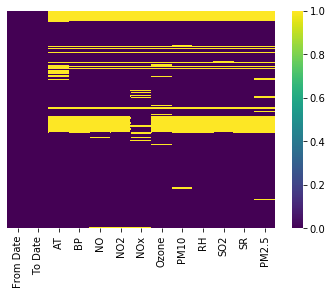

In [6]:
## Check for null values
sns.heatmap(df.isnull(),yticklabels=False,cmap='viridis')

In [7]:
df=df.dropna()

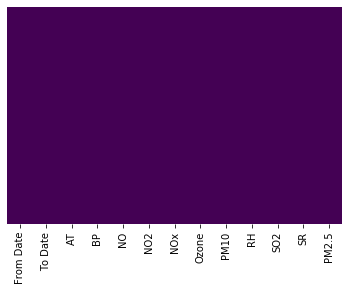

In [8]:
## Check for null values
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [18]:
X=df.iloc[:,2:-1] ## independent features
y=df.iloc[:,-1] ## dependent features

In [20]:
## check null values
X.isnull()

,AT,BP,NO,NO2,NOx,Ozone,PM10,RH,SO2,SR
295,False,False,False,False,False,False,False,False,False,False
296,False,False,False,False,False,False,False,False,False,False
297,False,False,False,False,False,False,False,False,False,False
298,False,False,False,False,False,False,False,False,False,False
299,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
5473,False,False,False,False,False,False,False,False,False,False
5474,False,False,False,False,False,False,False,False,False,False
5475,False,False,False,False,False,False,False,False,False,False
5476,False,False,False,False,False,False,False,False,False,False


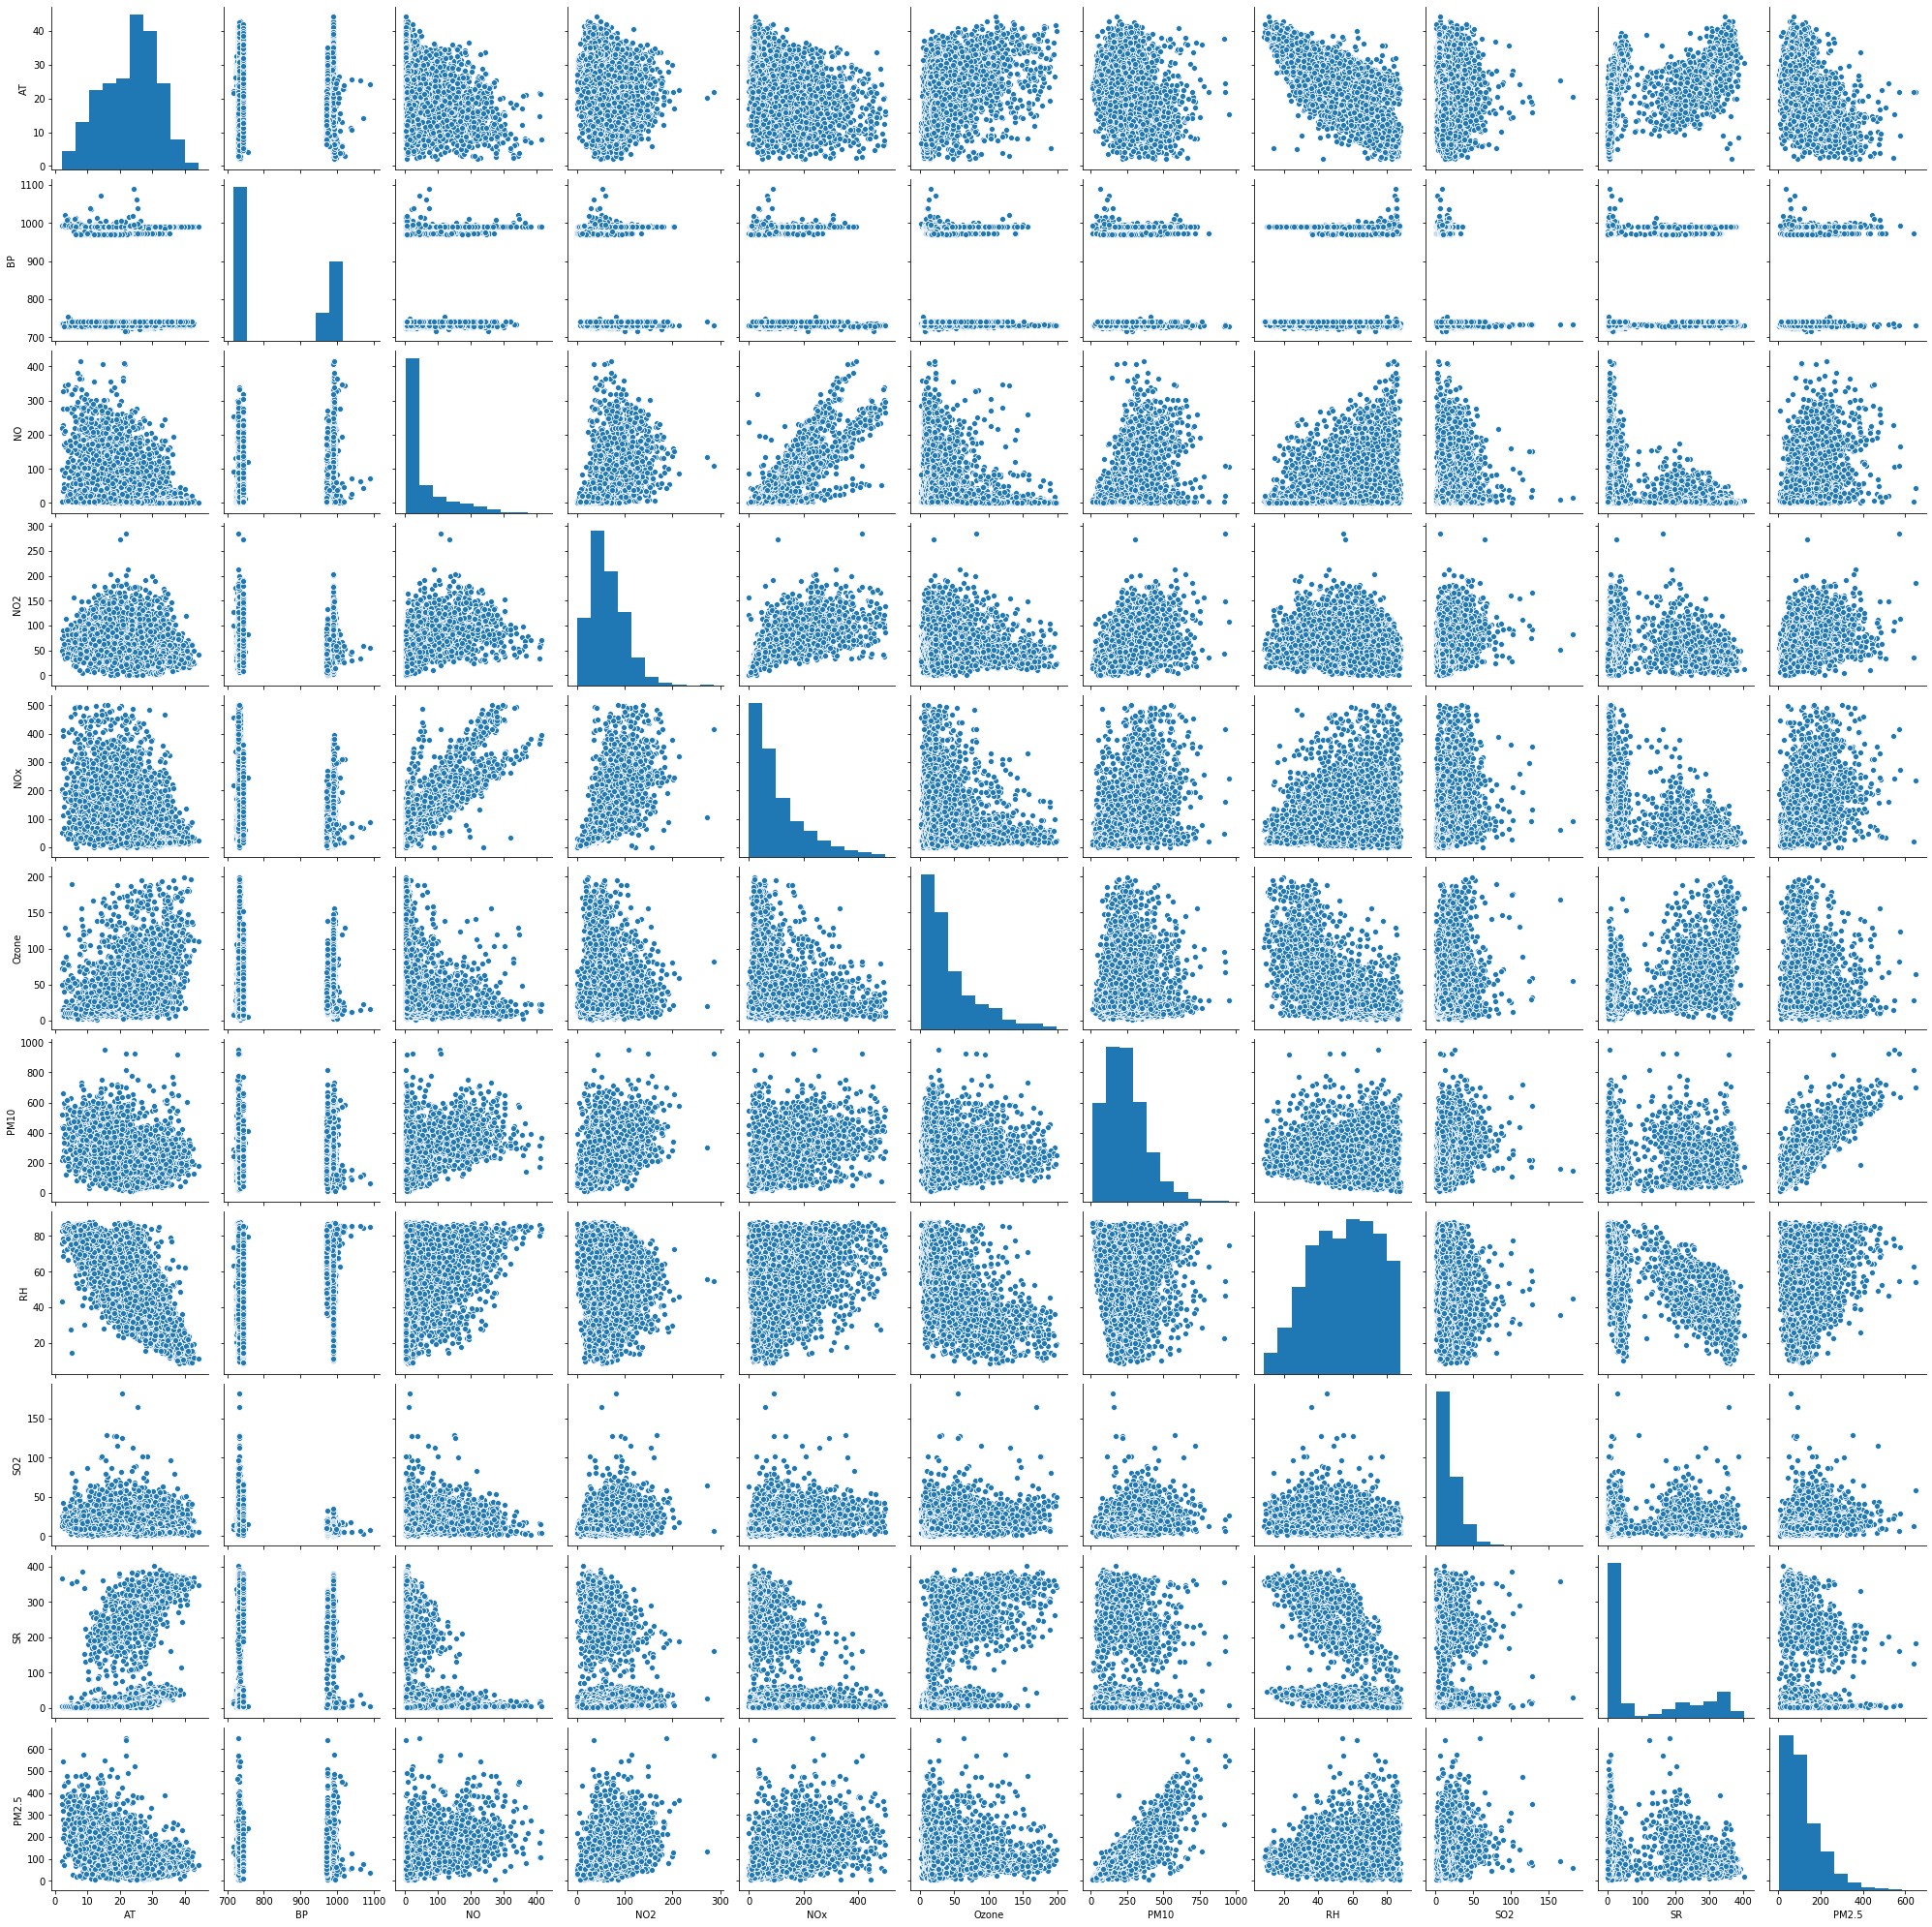

In [11]:
sns.pairplot(df)

In [21]:
df.corr()

,AT,BP,NO,NO2,NOx,Ozone,PM10,RH,SO2,SR,PM2.5
AT,1.000000,-0.022741,-0.438641,-0.270516,-0.382141,0.352277,-0.354580,-0.580696,-0.183103,0.482107,-0.536491
BP,-0.022741,1.000000,0.039386,-0.202227,-0.283421,-0.160705,-0.127384,0.186229,-0.430749,-0.057346,-0.093348
NO,-0.438641,0.039386,1.000000,0.502341,0.838743,-0.240060,0.485635,0.264761,0.143436,-0.394933,0.480181
NO2,-0.270516,-0.202227,0.502341,1.000000,0.664089,-0.085898,0.477003,-0.069044,0.297897,-0.316629,0.423003
NOx,-0.382141,-0.283421,0.838743,0.664089,1.000000,-0.210675,0.463150,0.207845,0.259373,-0.388620,0.457815
Ozone,0.352277,-0.160705,-0.240060,-0.085898,-0.210675,1.000000,0.102660,-0.613024,0.171958,0.630139,0.005366
PM10,-0.354580,-0.127384,0.485635,0.477003,0.463150,0.102660,1.000000,-0.127926,0.352524,-0.058747,0.848364
RH,-0.580696,0.186229,0.264761,-0.069044,0.207845,-0.613024,-0.127926,1.000000,-0.231833,-0.566778,0.125676
SO2,-0.183103,-0.430749,0.143436,0.297897,0.259373,0.171958,0.352524,-0.231833,1.000000,-0.018462,0.305956
SR,0.482107,-0.057346,-0.394933,-0.316629,-0.388620,0.630139,-0.058747,-0.566778,-0.018462,1.000000,-0.139410



### Correlation Matrix with Heatmap
Correlation states how the features are related to each other or the target variable.

Correlation can be positive (increase in one value of feature increases the value of the target variable) or negative (increase in one value of feature decreases the value of the target variable)

Heatmap makes it easy to identify which features are most related to the target variable, we will plot heatmap of correlated features using the seaborn library.

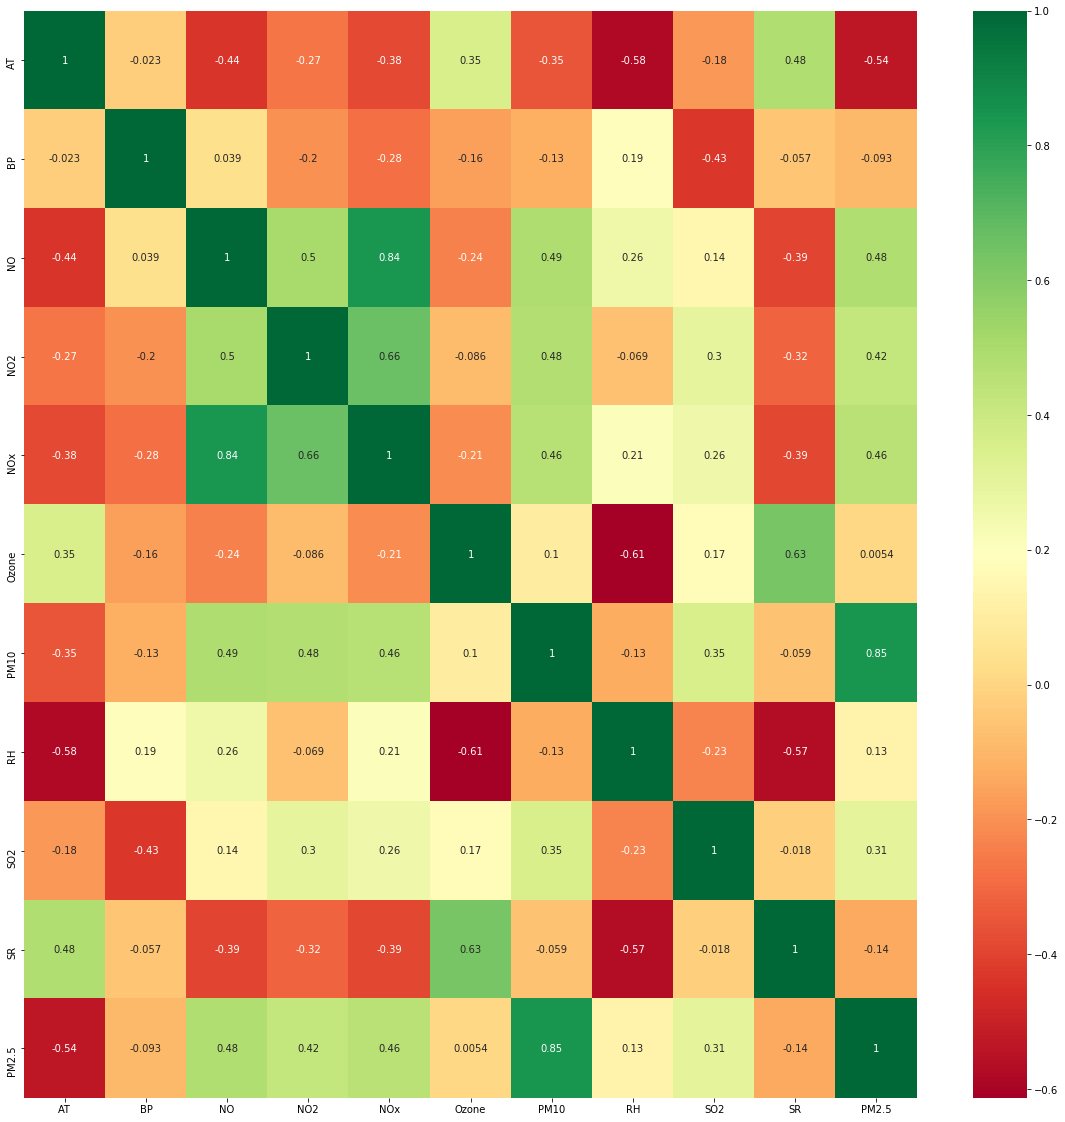

In [22]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [23]:
corrmat.index

Index(['AT', 'BP', 'NO', 'NO2', 'NOx', 'Ozone', 'PM10', 'RH', 'SO2', 'SR',
       'PM2.5'],
      dtype='object')

### Feature Importance
You can get the feature importance of each feature of your dataset by using the feature importance property of the model.

Feature importance gives you a score for each feature of your data, the higher the score more important or relevant is the feature towards your output variable.

Feature importance is an inbuilt class that comes with Tree Based Regressor, we will be using Extra Tree Regressor for extracting the top 10 features for the dataset.

In [24]:
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

In [25]:
X.head()

,AT,BP,NO,NO2,NOx,Ozone,PM10,RH,SO2,SR
295,30.64,730.91,7.14,11.82,20.93,155.56,172.10,24.47,11.45,402.96
296,24.85,726.86,7.73,82.04,86.64,62.31,170.31,37.75,13.97,37.78
297,18.71,733.97,6.88,80.51,83.77,8.16,186.20,60.71,20.96,28.02
298,30.61,729.98,7.07,26.42,34.28,129.26,246.79,30.06,16.09,381.89
299,26.31,727.46,9.00,85.16,90.24,53.39,265.02,38.11,8.84,40.31


In [15]:
print(model.feature_importances_)

[0.14599749 0.08021792 0.16563574 0.12823169 0.06061642 0.32849352
 0.05320496 0.03760224]


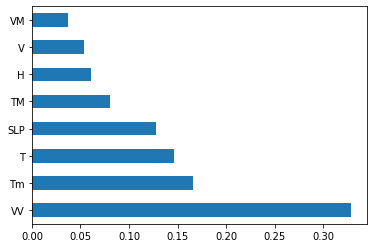

In [16]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

## Linear Regression

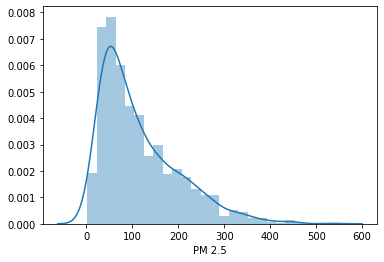

In [17]:
sns.distplot(y)

### Train Test split

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [21]:
regressor.coef_

array([ 2.73477022e+00,  1.70110832e+00, -7.83080429e+00,  1.03769225e+00,
       -6.00946869e-01, -6.01989355e+01, -2.83266610e+00,  1.74851973e-02])

In [22]:
regressor.intercept_

-742.9971408468244

In [23]:
print("Coefficient of determination R^2 <-- on train set: {}".format(regressor.score(X_train, y_train)))

Coefficient of determination R^2 <-- on train set: 0.659250042162645


In [24]:
print("Coefficient of determination R^2 <-- on test set: {}".format(regressor.score(X_test, y_test)))

Coefficient of determination R^2 <-- on test set: 0.6734800849147684


In [25]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(regressor,X,y,cv=5)

In [26]:
score.mean()

0.5285513620842777

### Model Evaluation

In [27]:
coeff_df = pd.DataFrame(regressor.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
T,2.734770
TM,1.701108
Tm,-7.830804
SLP,1.037692
H,-0.600947
VV,-60.198936
V,-2.832666
VM,0.017485



### Interpreting the coefficients:

##### Holding all other features fixed, a 1 unit increase in T is associated with an decrease of 1.280 in AQI PM2.5 .


##### Holding all other features fixed, a 1 unit increase in TM is associated with an decrease of 4.75 in AQI PM 2.5 .

In [28]:
prediction=regressor.predict(X_test)

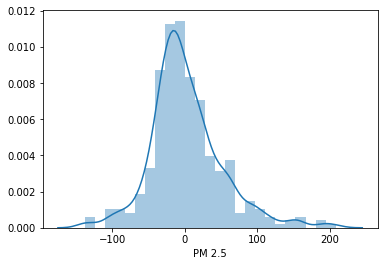

In [29]:
sns.distplot(y_test-prediction)

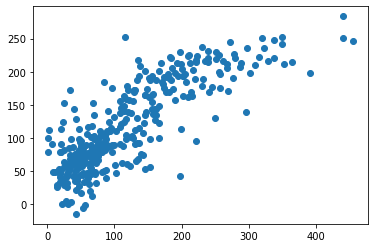

In [30]:
plt.scatter(y_test,prediction)

## Regression Evaluation Metrics
Here are three common evaluation metrics for regression problems:

Mean Absolute Error (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$
Mean Squared Error (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$
Root Mean Squared Error (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$
Comparing these metrics:

MAE is the easiest to understand, because it's the average error.

MSE is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.

RMSE is even more popular than MSE, because RMSE is interpretable in the "y" units.

All of these are loss functions, because we want to minimize them.

In [31]:
from sklearn import metrics

In [32]:
print('Linear Regression')
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

Linear Regression
MAE: 36.60504273894725
MSE: 2535.0039422462
RMSE: 50.34882265005012


In [33]:
import pickle

In [34]:
file = open('regression_model.pkl', 'wb')

# dump model information to that file
pickle.dump(regressor, file)

## Comparison Linear, Ridge and Lasso Regression


#### Train Test split

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### Linear Regression

In [36]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
lin_regressor=LinearRegression()
mse=cross_val_score(lin_regressor,X,y,scoring='neg_mean_squared_error',cv=5)
mean_mse=np.mean(mse)
print(mean_mse)

-2848.991179035259


### Ridge Regression

In [37]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge=Ridge()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40]}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(X,y)

GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [38]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 30}
-2826.612499673037


### Lasso Regression

In [39]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

lasso=Lasso()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40]}
lasso_regressor=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)
lasso_regressor.fit(X,y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1169787.490567983, tolerance: 723.7390917816559
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1068076.7761575587, tolerance: 610.6046324551694
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 940663.0589109473, tolerance: 679.7105659538465
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality 

GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [40]:
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

{'alpha': 1}
-2842.1481098284626


### Model Evaluation

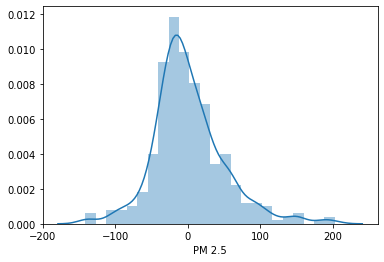

In [41]:
prediction=lasso_regressor.predict(X_test)
sns.distplot(y_test-prediction)

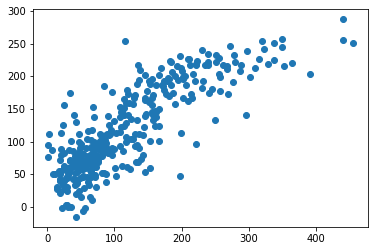

In [42]:
plt.scatter(y_test,prediction)

In [43]:
from sklearn import metrics
print('Lasso_regressor')
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

Lasso_regressor
MAE: 36.24165391406105
MSE: 2465.339041409419
RMSE: 49.65218063095939


In [44]:
# open a file, where you ant to store the data
file = open('lasso_regression_model.pkl', 'wb')

# dump information to that file
pickle.dump(lasso_regressor, file)